In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score,cohen_kappa_score,confusion_matrix, classification_report,f1_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;">Read the dataset 

In [2]:
data = pd.read_csv('OnlineNewsPopularity.csv')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
print('Number of rows: {} \nNumber of columns: {}'.format(data.shape[0],data.shape[1]))

Number of rows: 39644 
Number of columns: 61


In [4]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [5]:
# The above output tells as that there isis a preceding space in every column name. 
data[' timedelta'].head()

0    731.0
1    731.0
2    731.0
3    731.0
4    731.0
Name:  timedelta, dtype: float64

In [6]:
# Lets delete the preceding space from the column name and update the same for our convenience.
data.columns = data.columns.str.lstrip(' ') 
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [7]:
data.get_dtype_counts()

float64    59
int64       1
object      1
dtype: int64

In [8]:
#checking for the Null values. this query will do the sum of all the null values in the dataset. 
data.isnull().sum().sum()

0

In [9]:
#Below Code will show the full dataset output. 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(data.describe())

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

### Inference:

We have 61 attributed, out of which 2 are non-predictive (noise) attributes viz. URL & timedelta. therefore we will remove them from the dataset before building model. There is only one object variable - URL

In this dataset,data was provided by doing the one-hot encoding converting the categorical data to the numeric. Also continuous varible is transformed.

Dataset doesn't have the null values, therefore it is completely clean dataset. 

# EDA

data without outliers 1920.7114413444822
data with outliers 3395.3801836343455


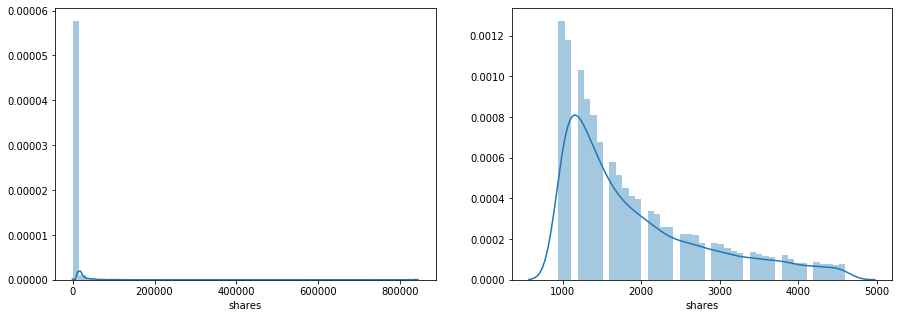

In [10]:
#First let's find the threshold based on which we will categorize dataset into Popular and Non-Popular
def outliers(x,y):
    q3 = x[y].quantile(q=.75)
    q1 = x[y].quantile(q=.25)
    iqr = q3-q1
    upper_limit= q3+iqr
    lower_limit = q3-iqr
    
    print('data without outliers',x[(x[y] > lower_limit) & (x[y]<upper_limit)]['shares'].mean())
    print('data with outliers',x['shares'].mean())
    
    figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    sns.distplot(x['shares'],ax=axes[0])
    sns.distplot(x[(x[y] > lower_limit) & (x[y]<upper_limit)]['shares'],ax=axes[1])
    
outliers(data,'shares')

In [11]:
np.median(data['shares'])

1400.0

In [12]:
# if share > 1400 = Popular,  if share < 1400 unpopular )  unpopular = 0 & popular = 1
data['popular_label'] = data.shares.apply(lambda x:0 if x<=1400 else 1)
data.popular_label.head(5)

0    0
1    0
2    1
3    0
4    0
Name: popular_label, dtype: int64

In [13]:
list1 = ['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords','self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popular_label']

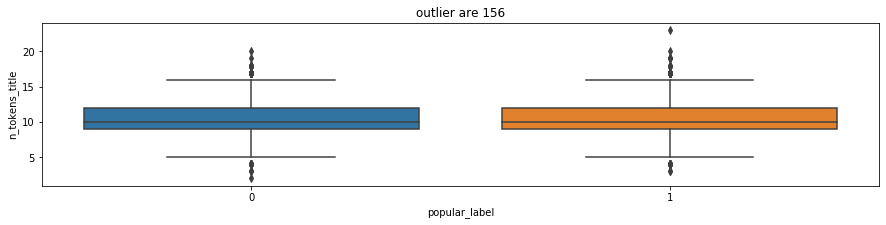

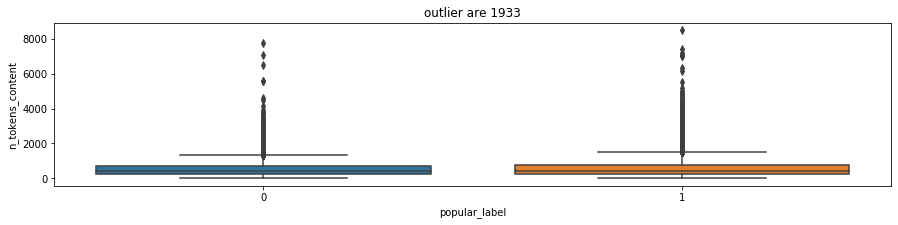

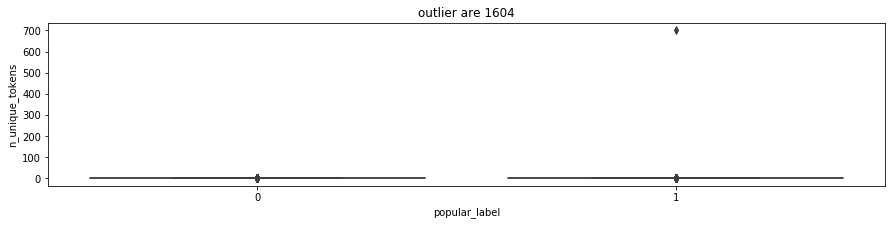

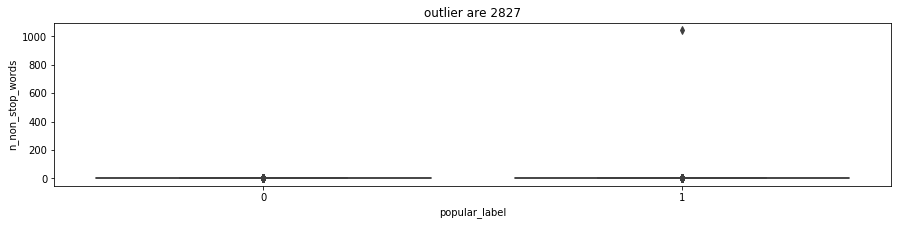

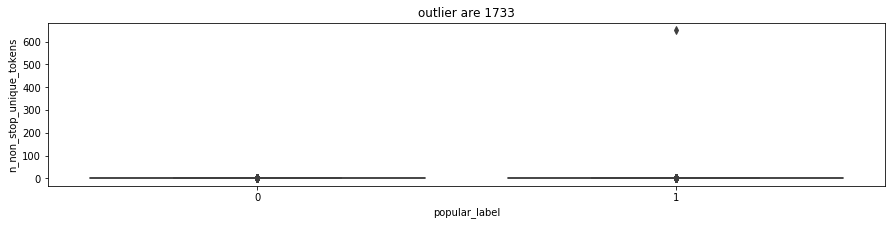

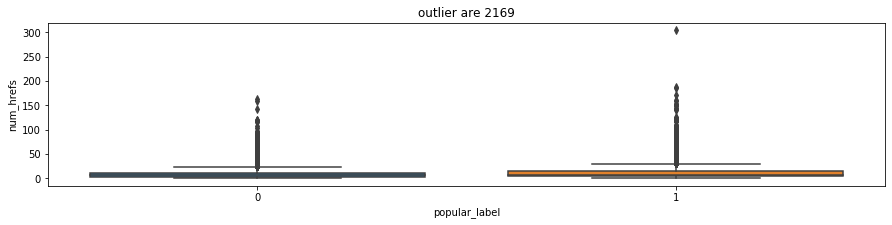

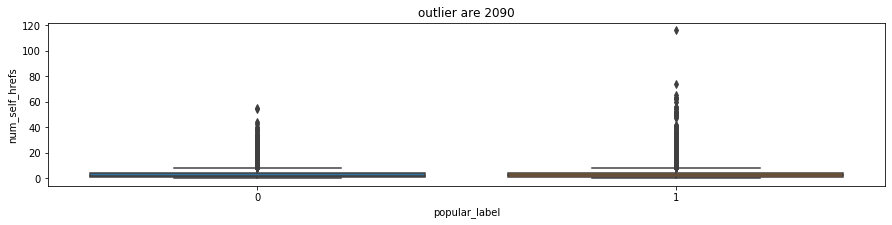

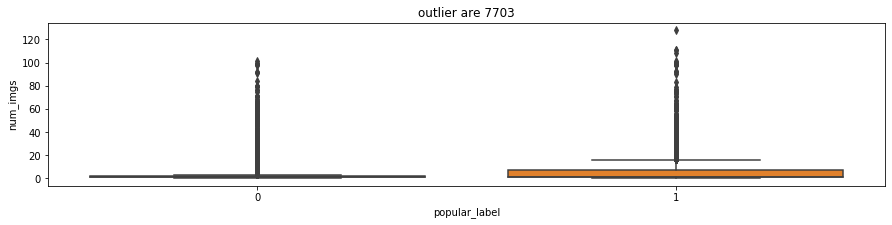

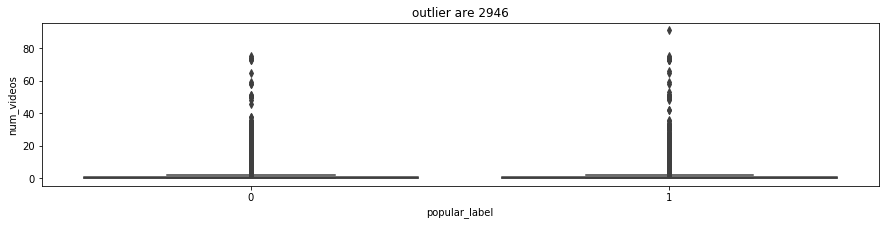

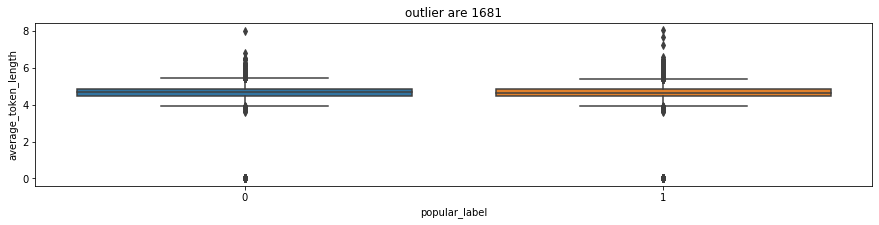

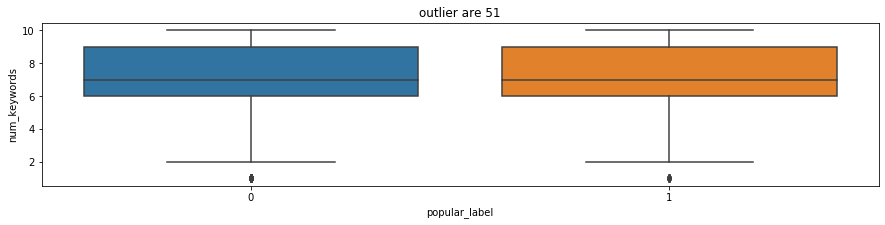

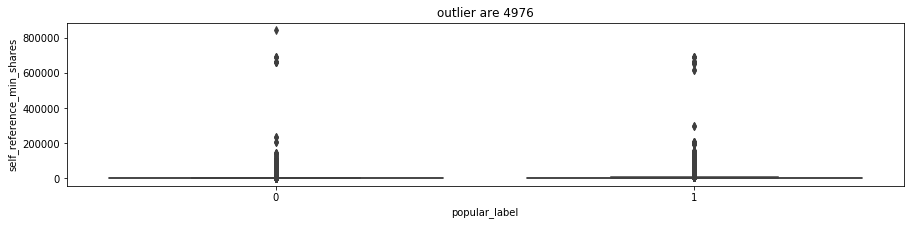

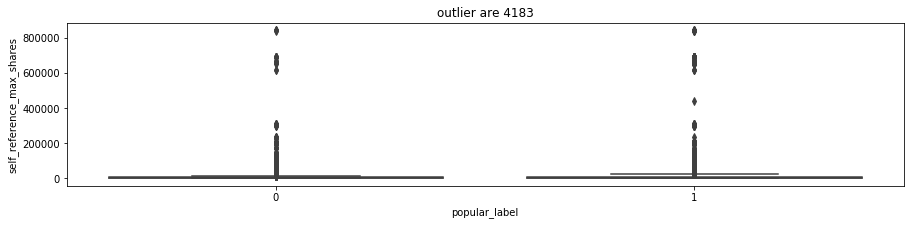

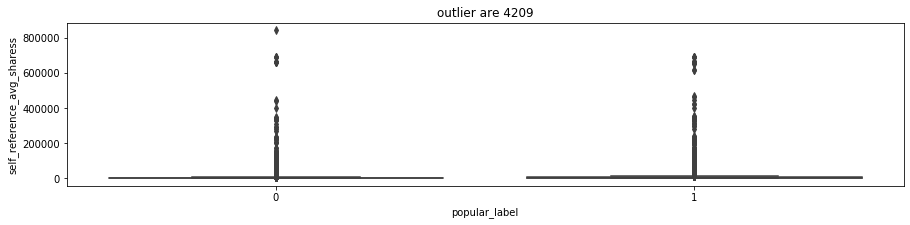

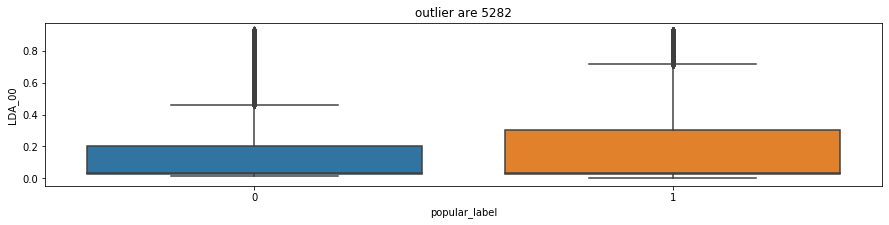

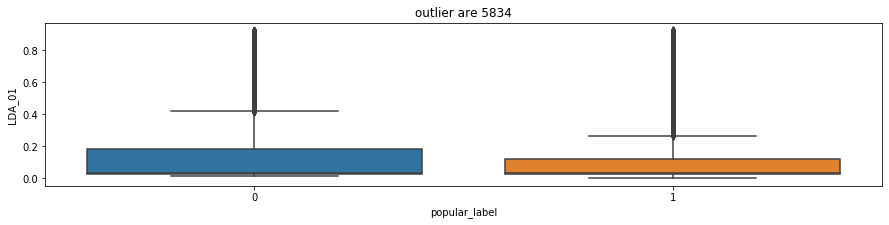

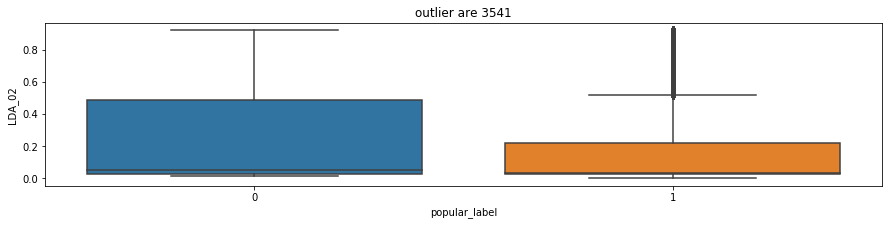

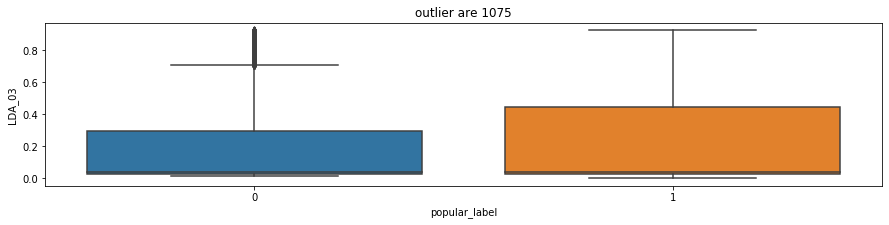

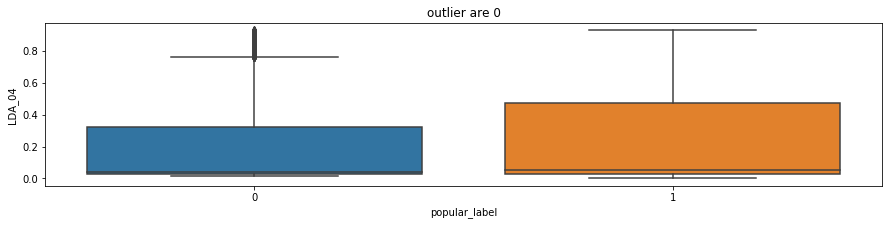

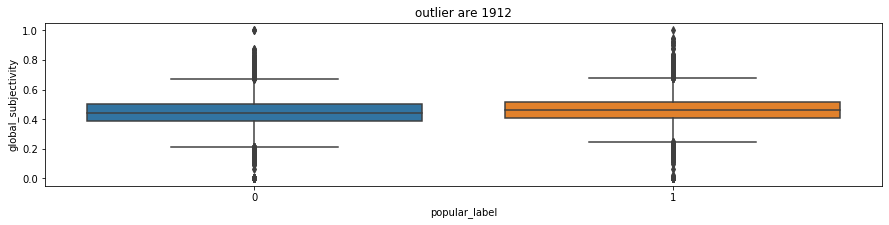

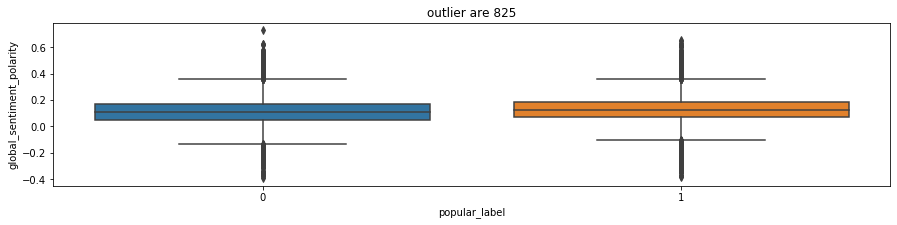

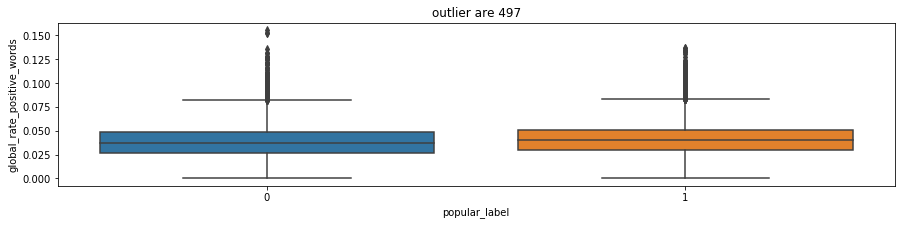

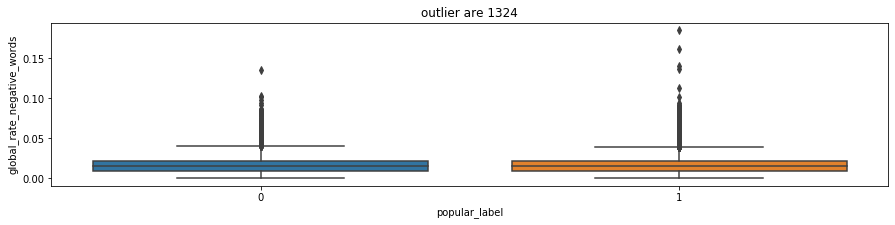

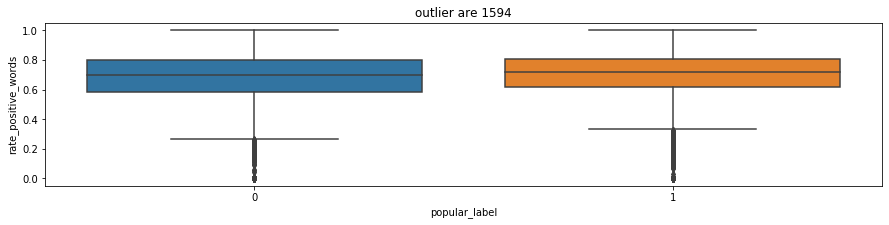

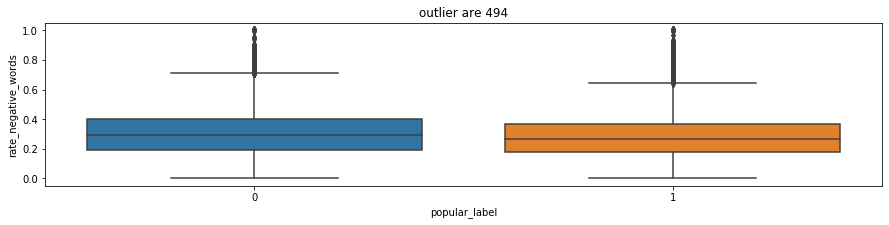

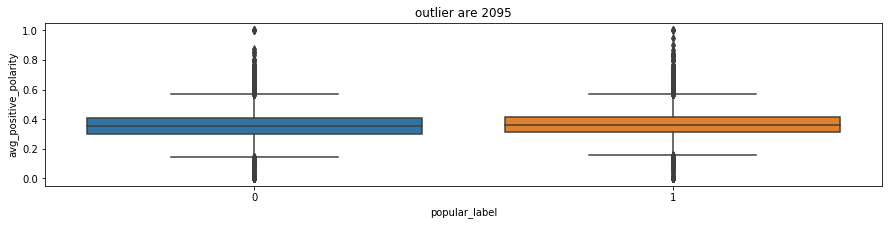

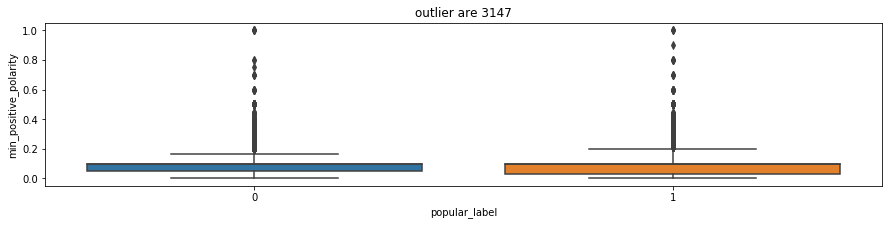

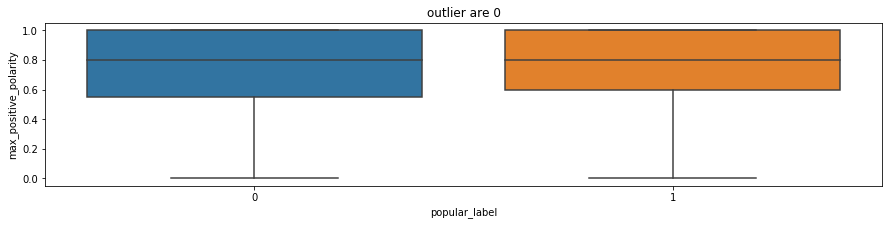

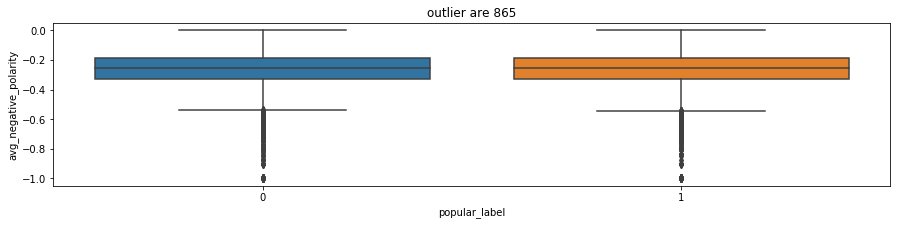

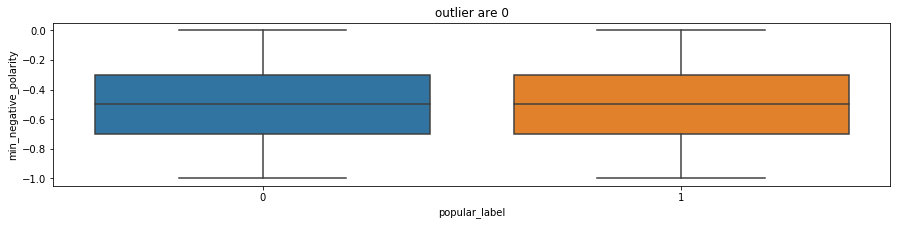

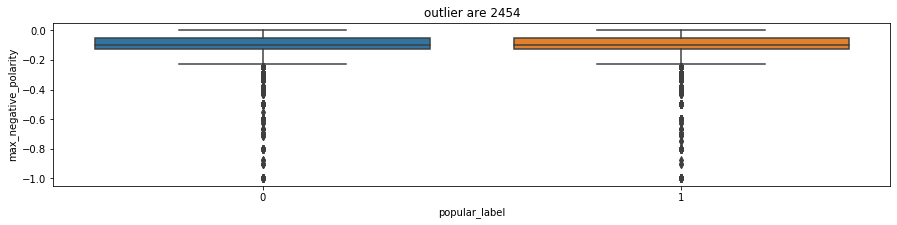

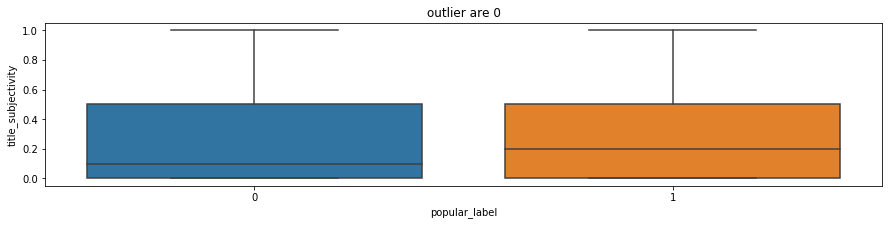

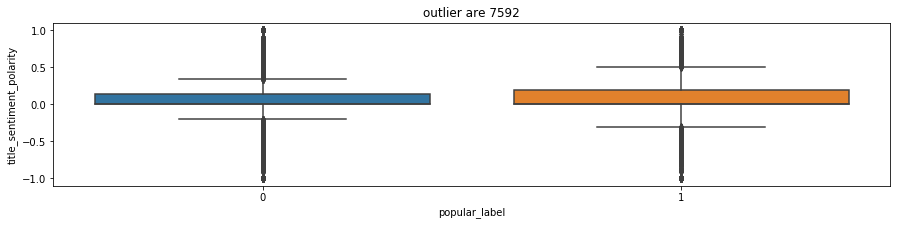

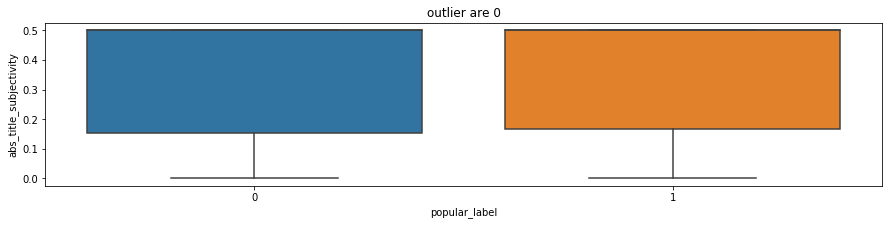

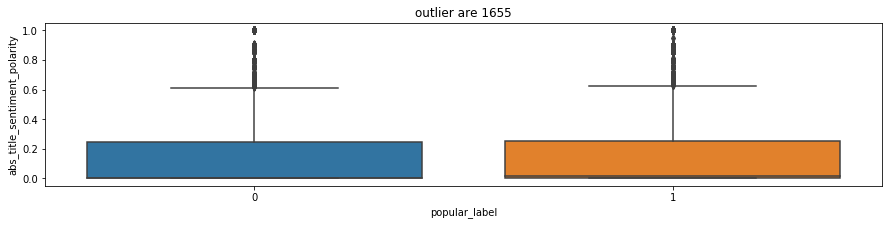

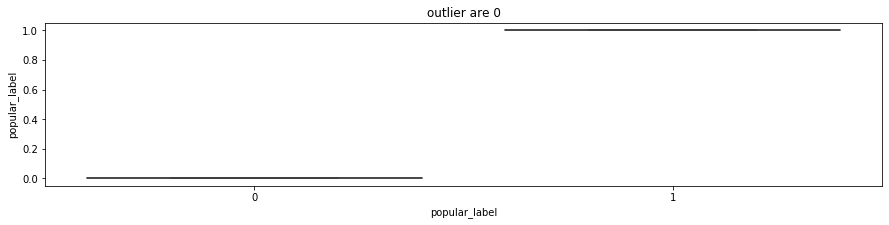

In [14]:
def outlier(temp1,nm):
    l = nm
    r=1.5
    Q3 = temp1[l].quantile(q=.75)
    Q1 = temp1[l].quantile(q=.25)
    IQR = Q3-Q1
    upper_limit = Q3 + (IQR*r)
    lower_limit = Q1 - (IQR*r)
    outlier_no = temp1[(temp1[l] < lower_limit) | (temp1[l] > upper_limit)].shape
    #withou_outlier = 
    #print('Out of {} observations, total outliers in feature {} is {}'.format(temp1.shape[0],l.upper(),outlier_no[0]))
    #print('Mean without outlier:',temp1[(temp1[l] > lower_limit) & (temp1[l] < upper_limit)][l].mean())
    #print('Mean with outlier',temp1[l].mean())
    plt.figure(figsize=(15,3))
    sns.boxplot(data['popular_label'],temp1[l]).set_title('outlier are '+str(outlier_no[0]))


for i in list1 :
    outlier(data,i)


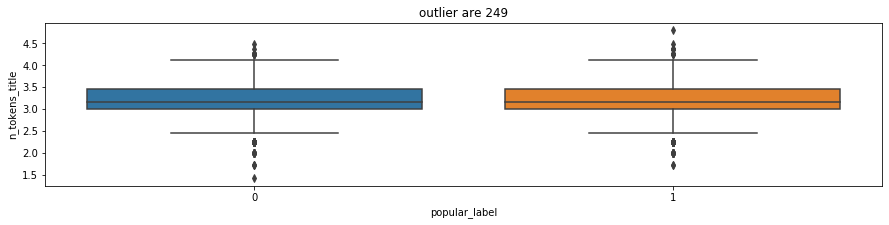

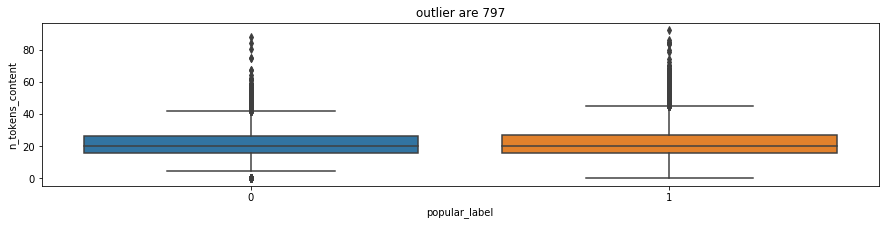

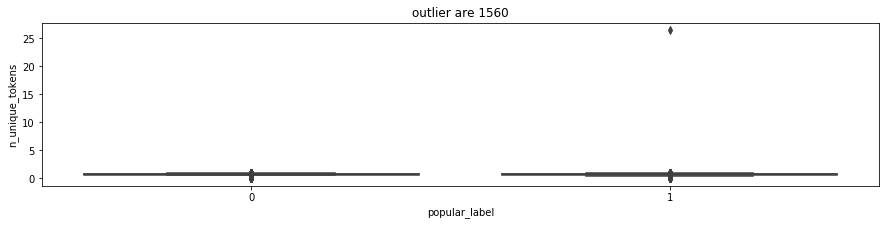

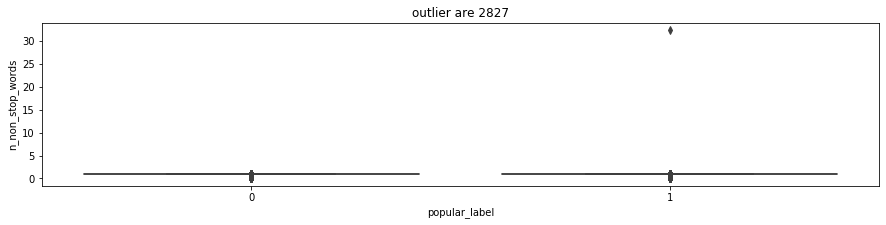

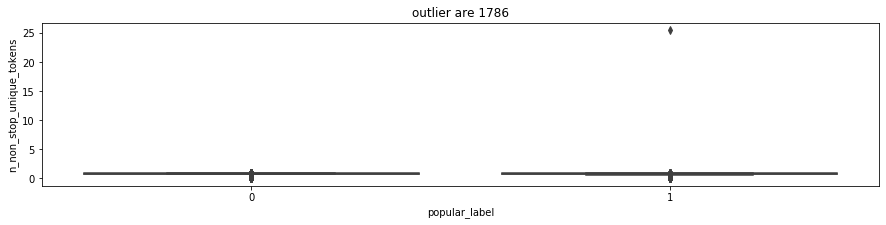

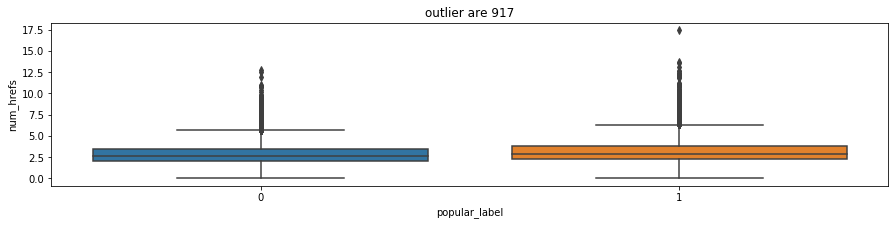

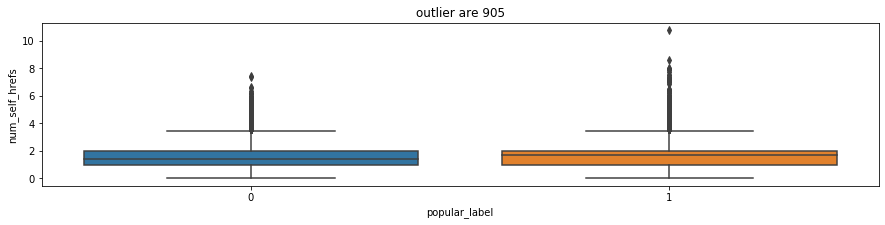

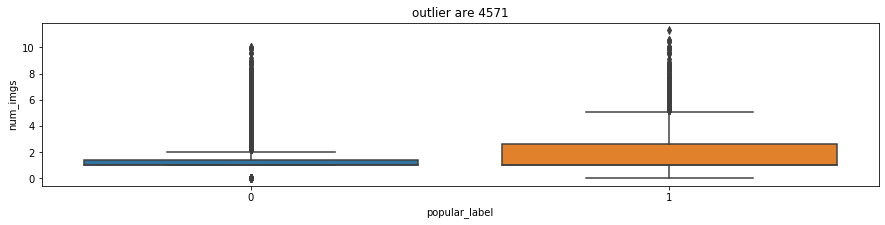

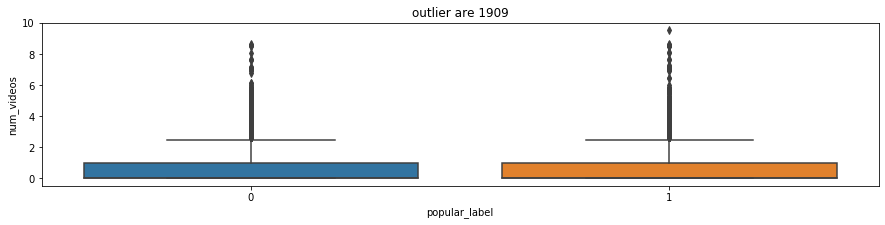

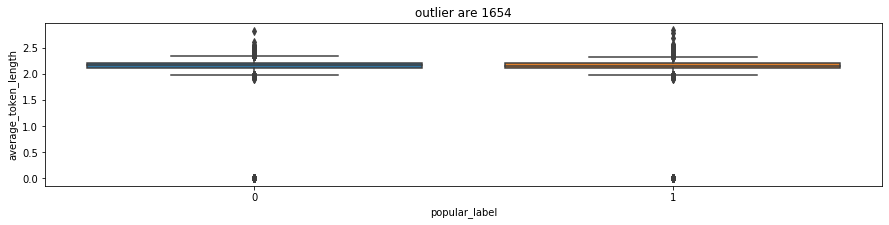

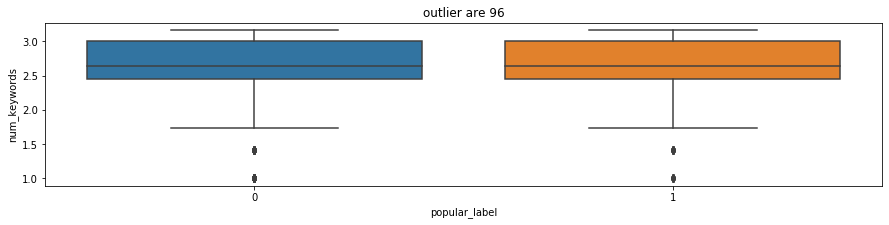

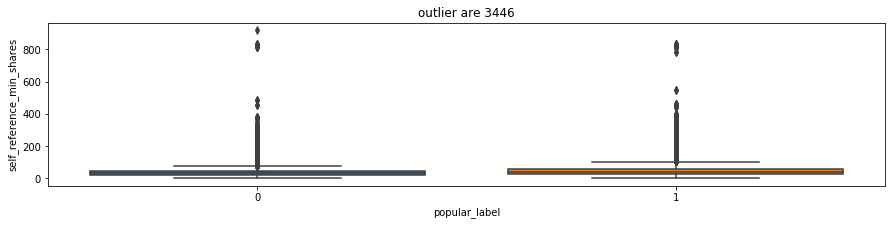

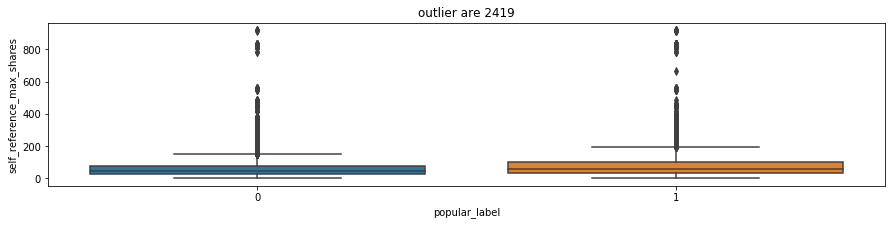

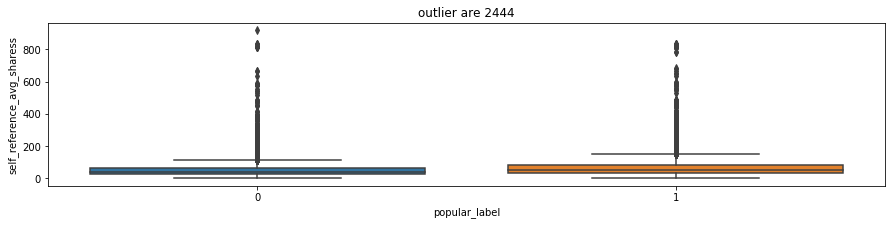

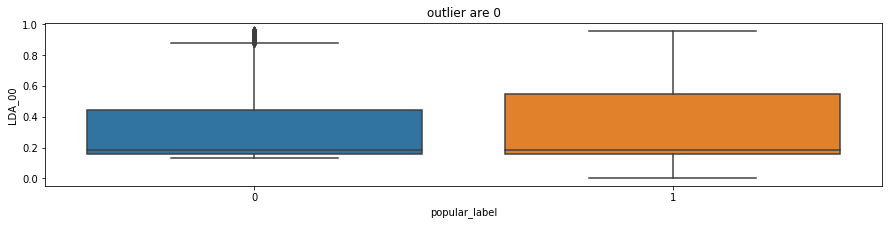

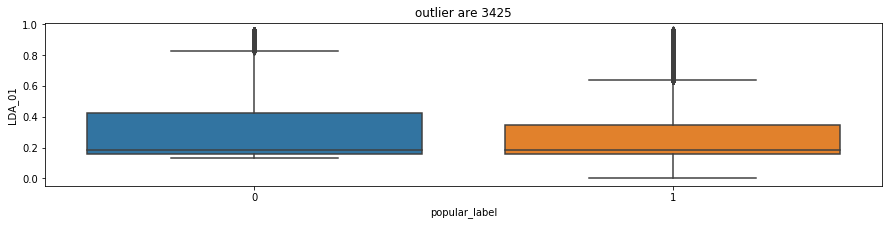

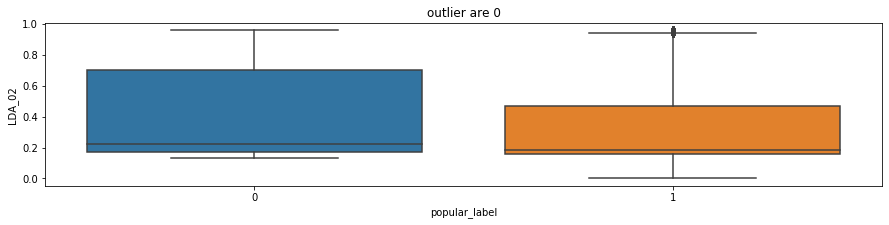

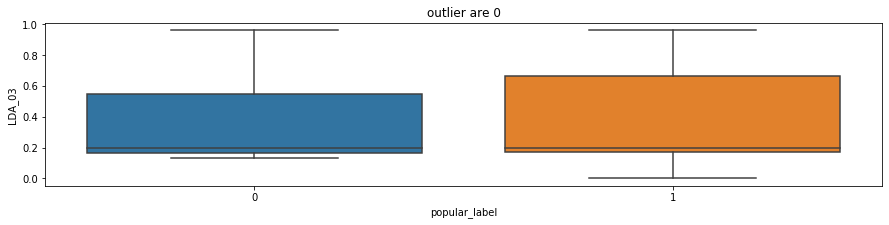

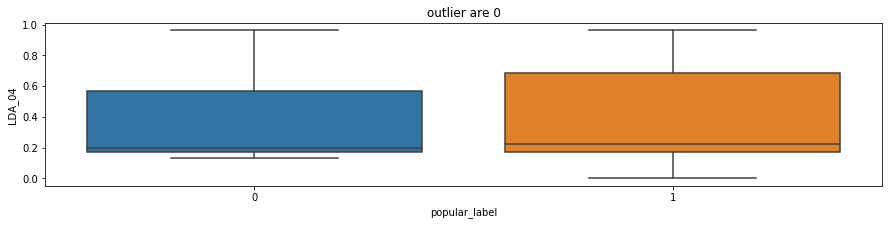

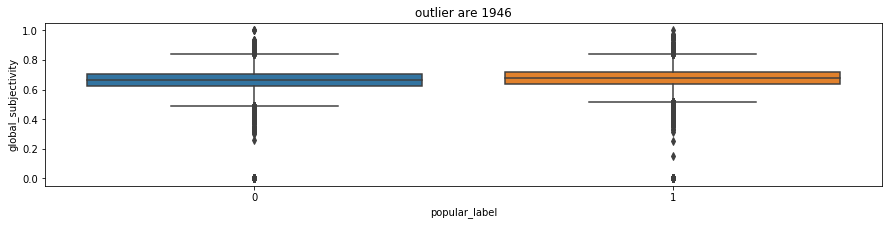

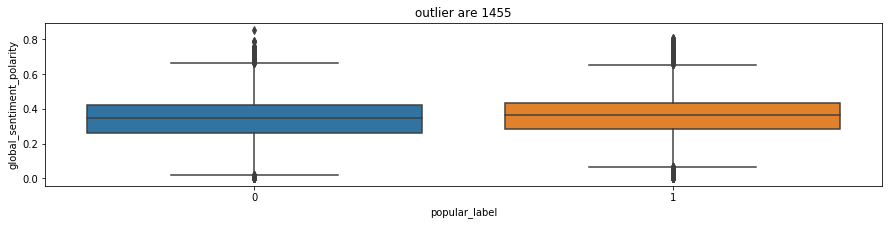

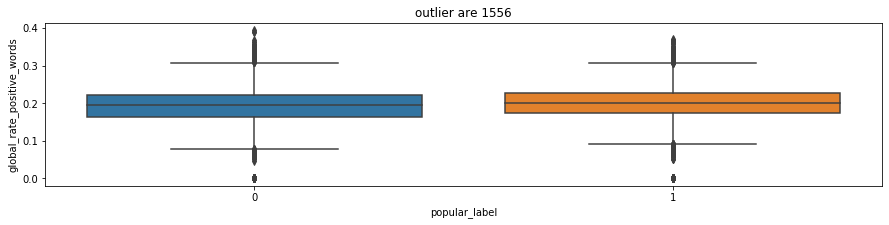

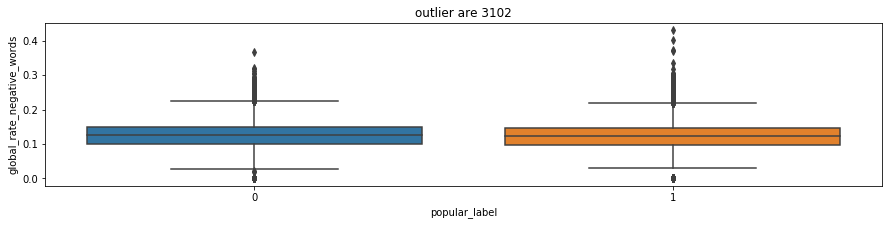

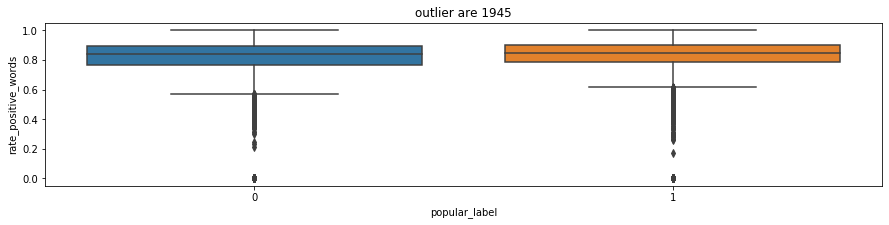

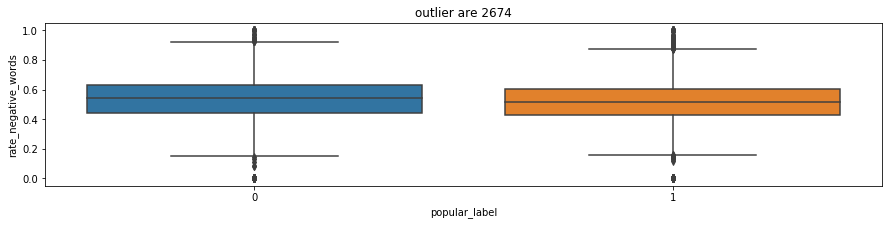

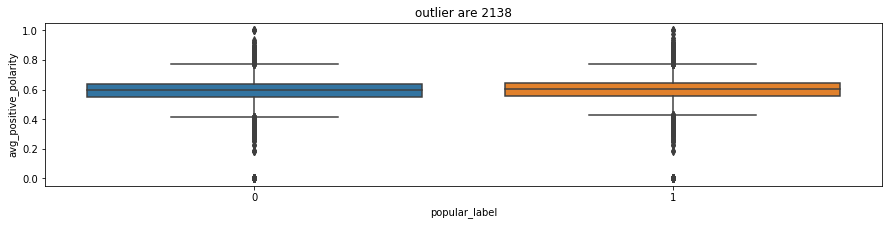

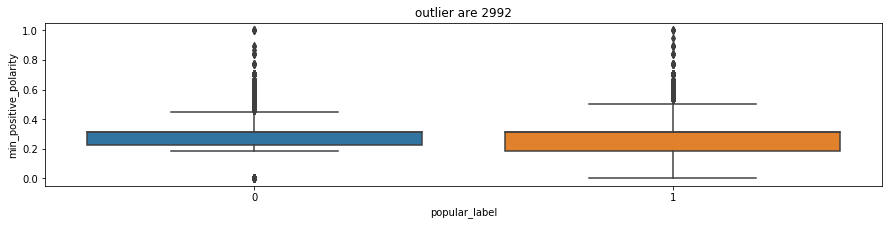

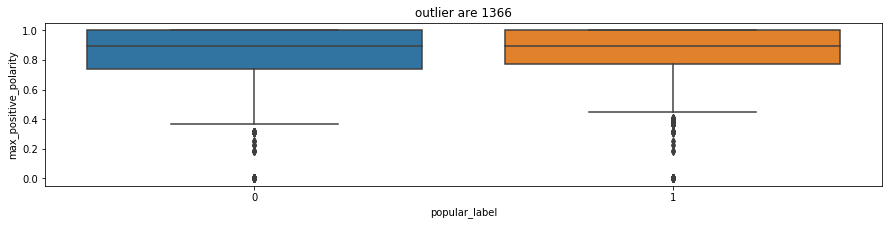

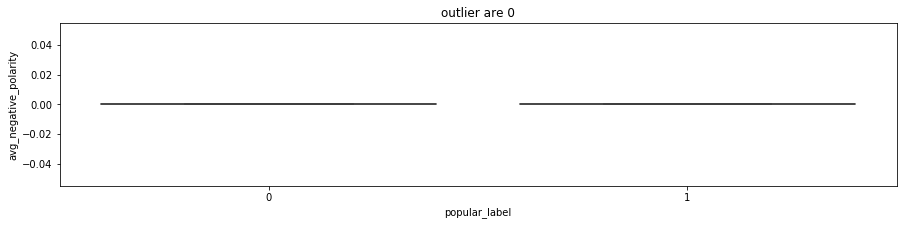

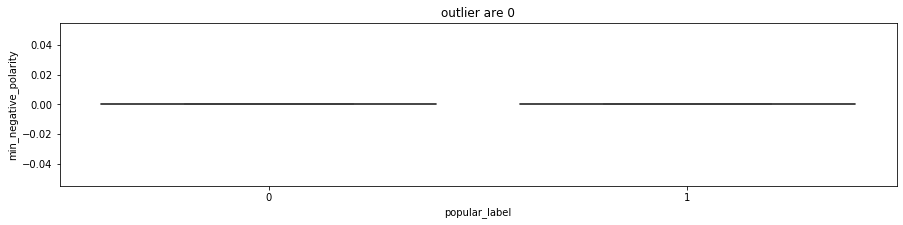

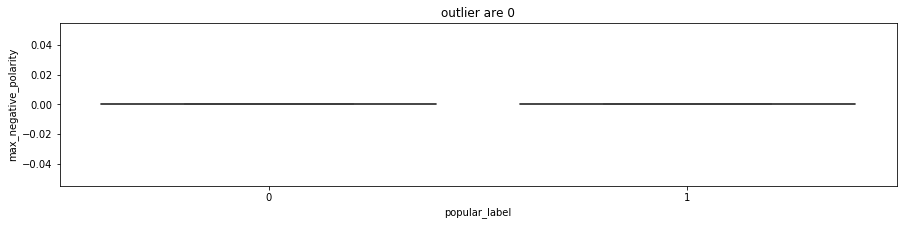

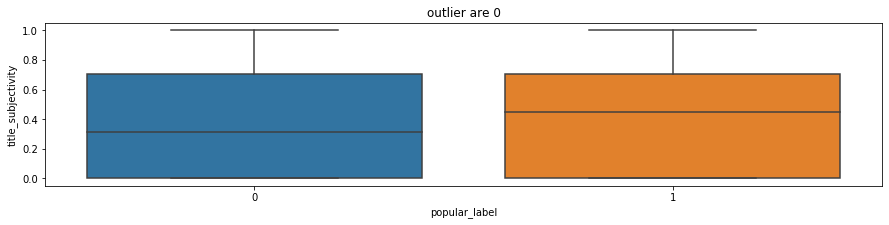

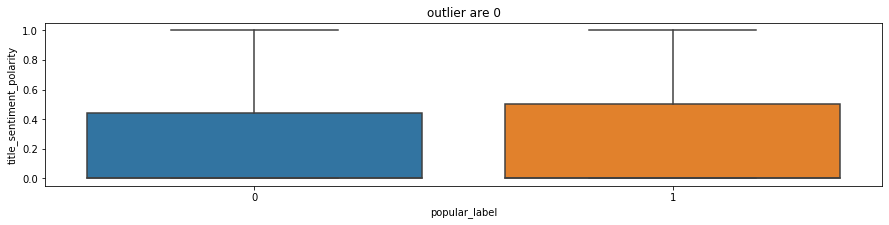

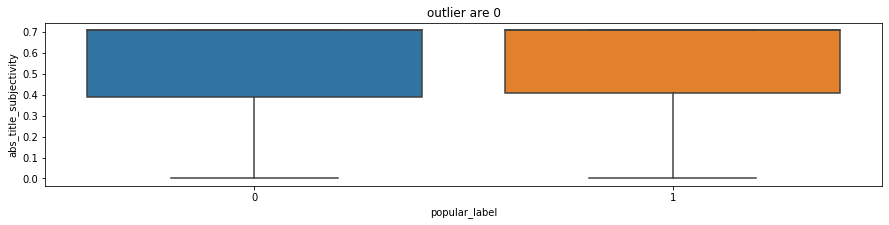

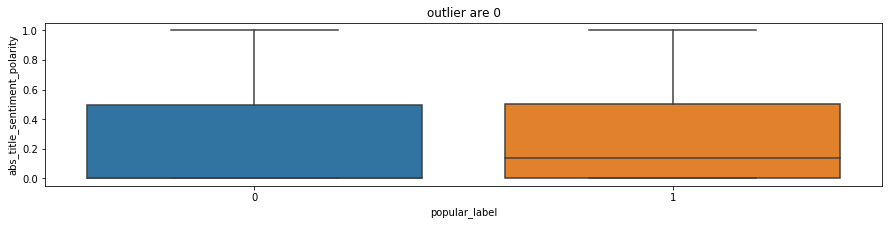

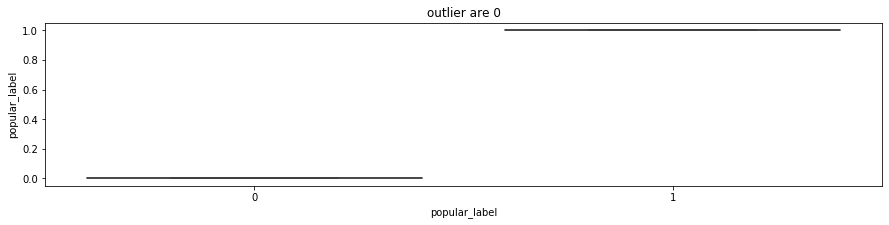

In [15]:
transform = ['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords','self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']

new_df = data.copy()
for i in transform:
    new_df[i] = new_df[i].apply(lambda x:np.sqrt(x))
    
for i in list1:
    outlier(new_df,i)


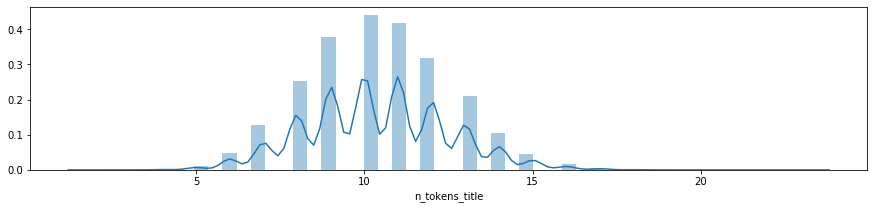

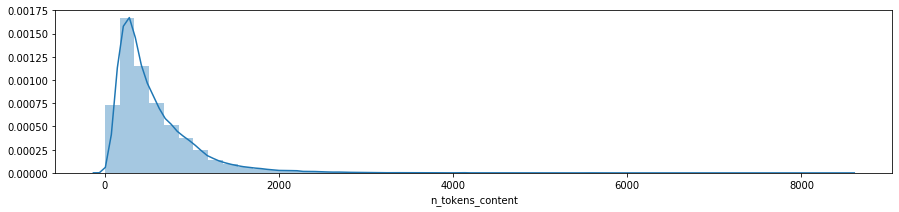

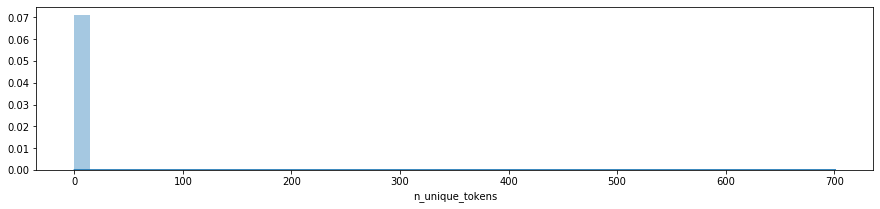

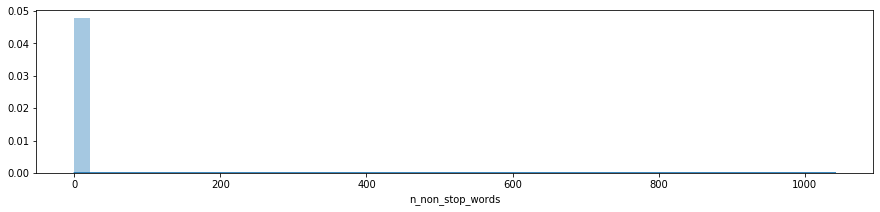

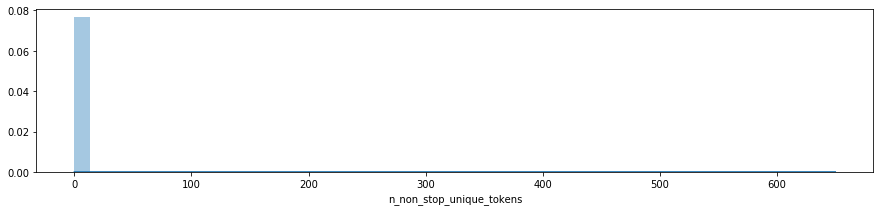

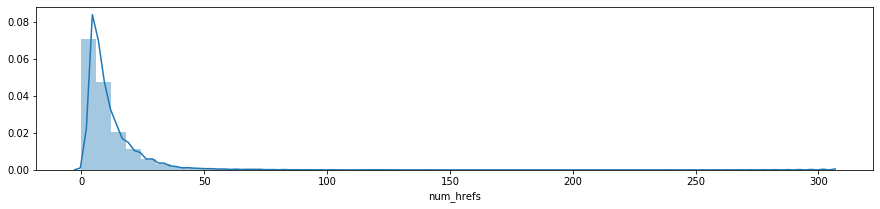

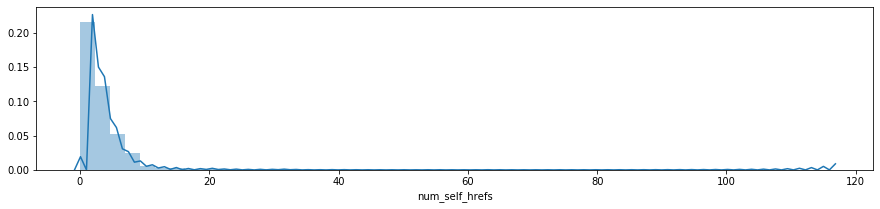

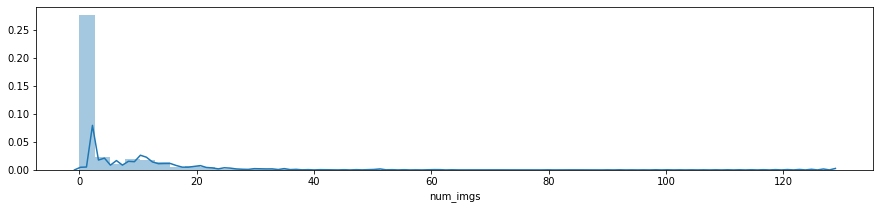

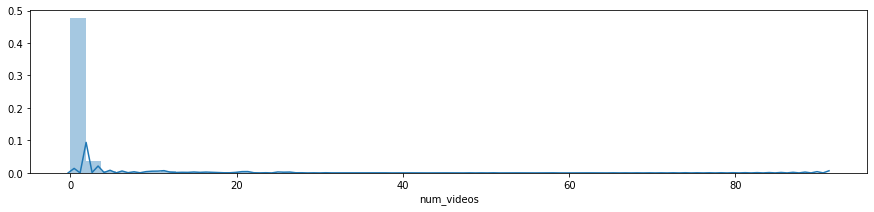

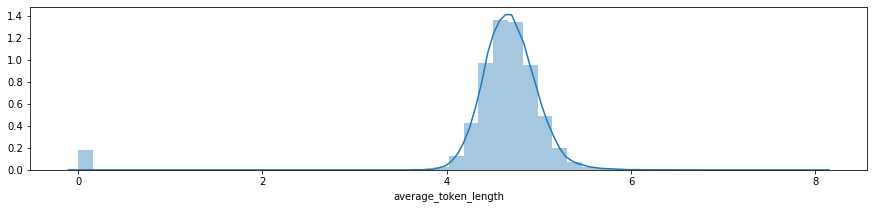

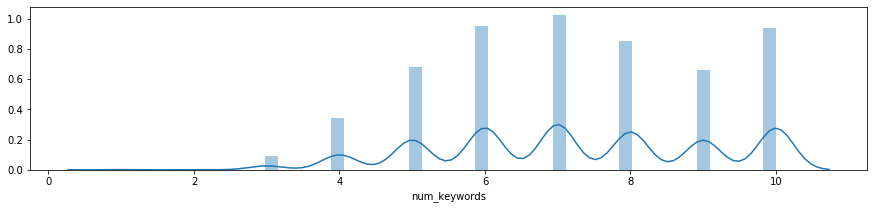

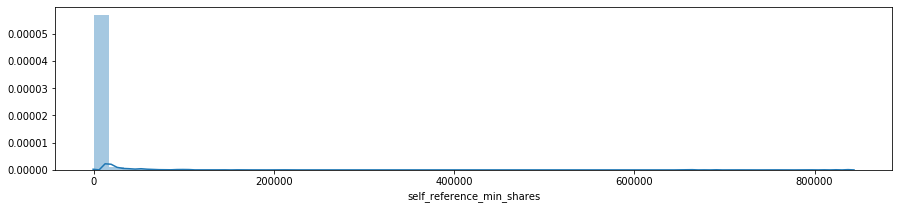

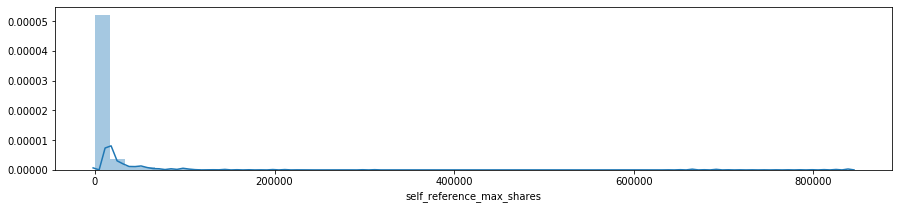

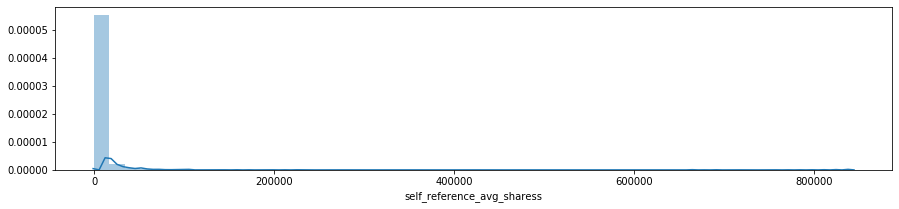

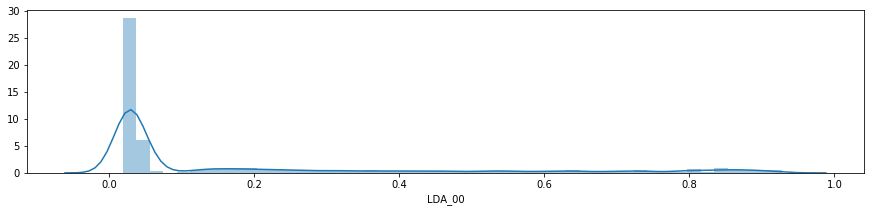

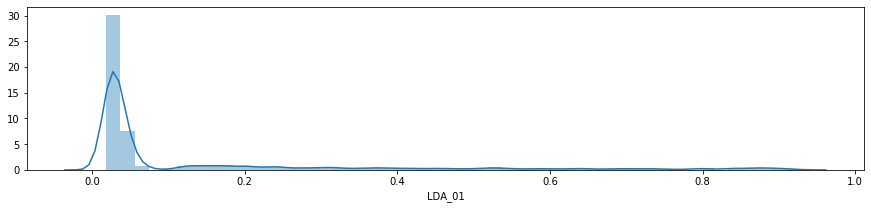

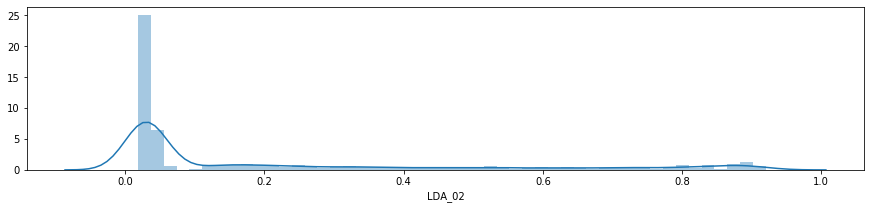

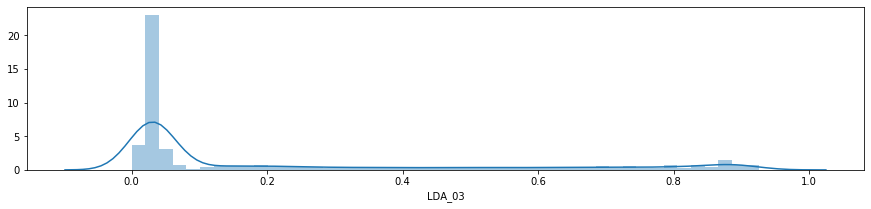

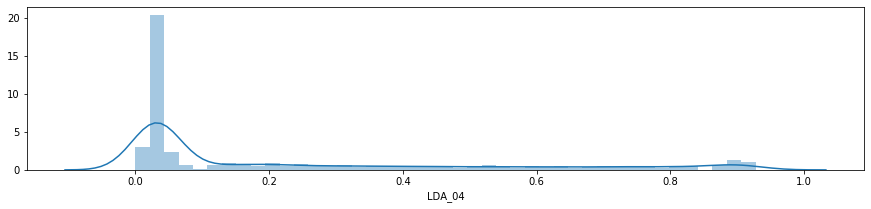

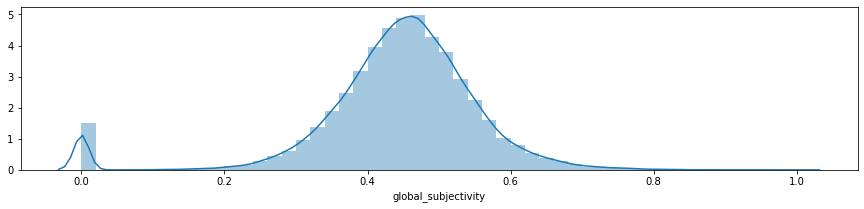

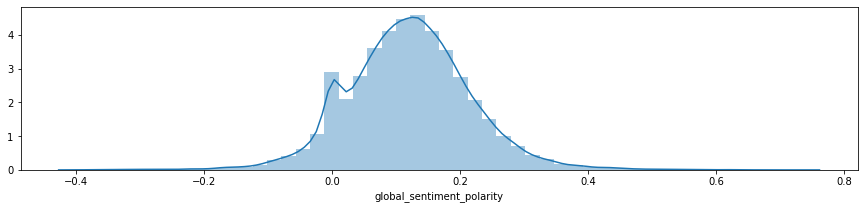

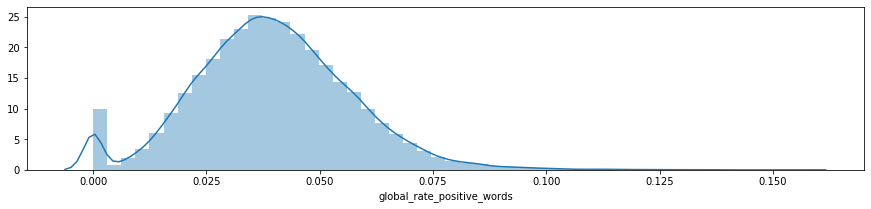

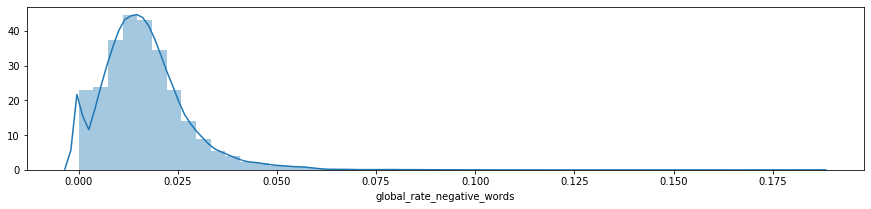

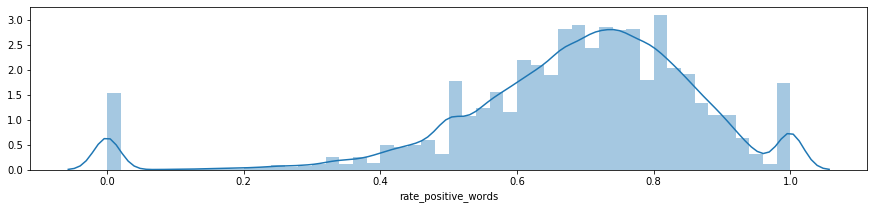

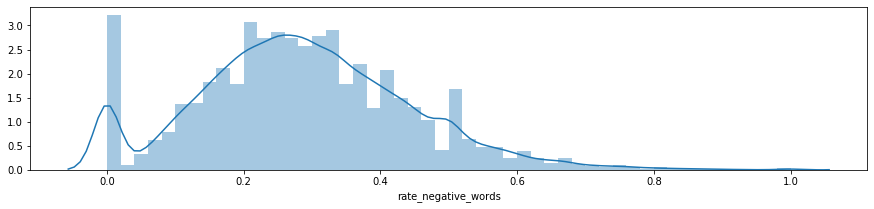

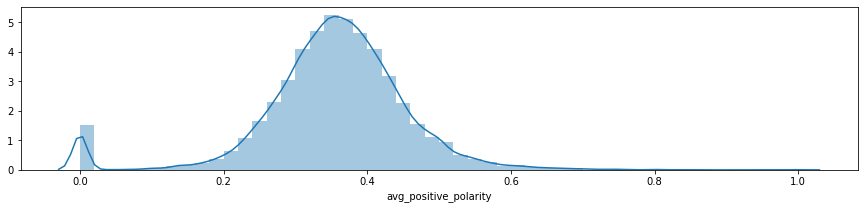

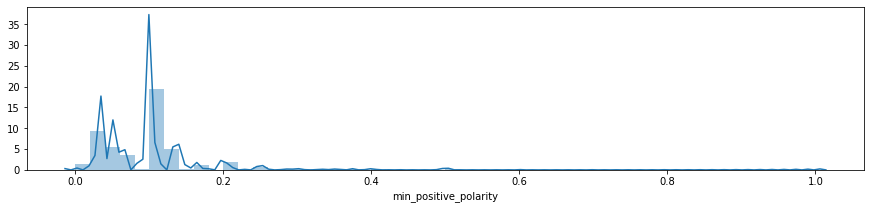

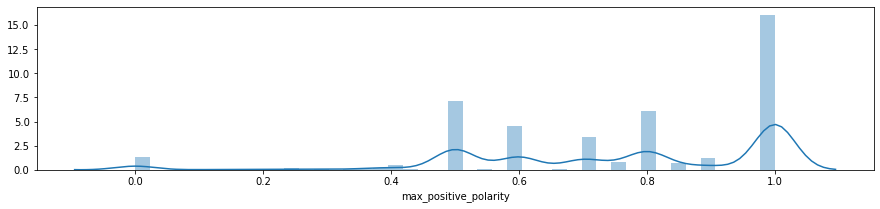

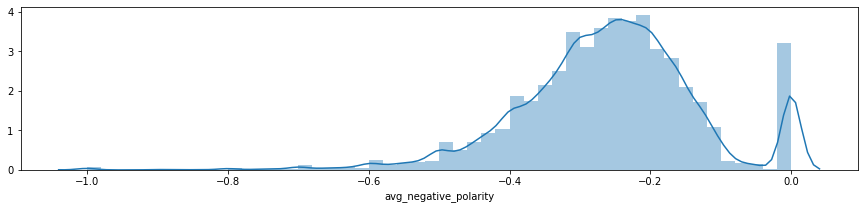

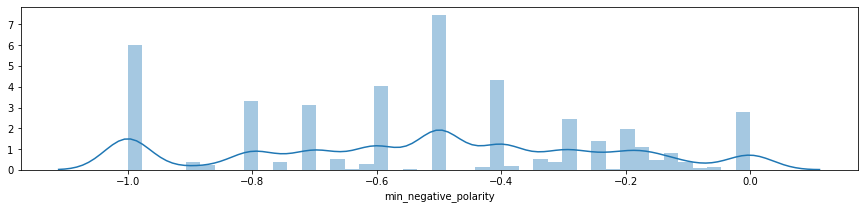

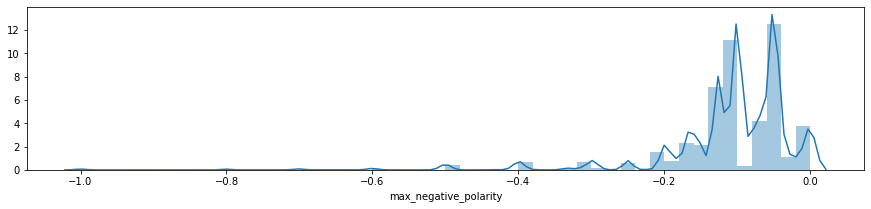

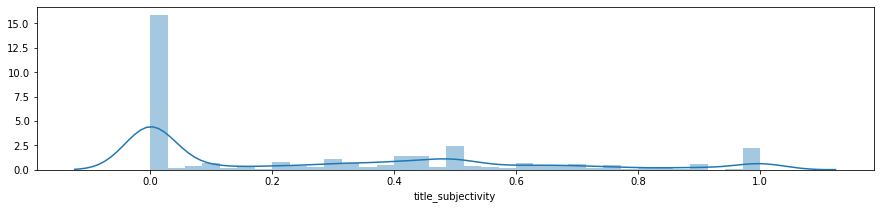

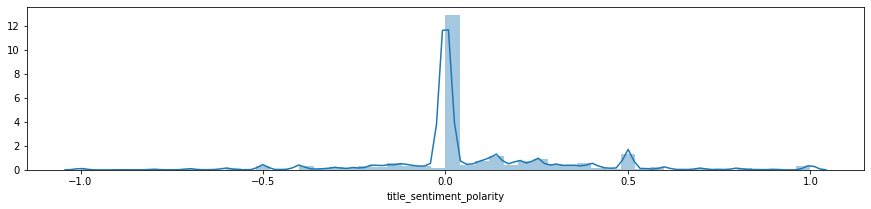

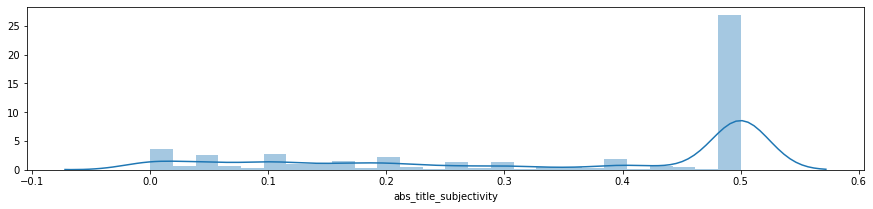

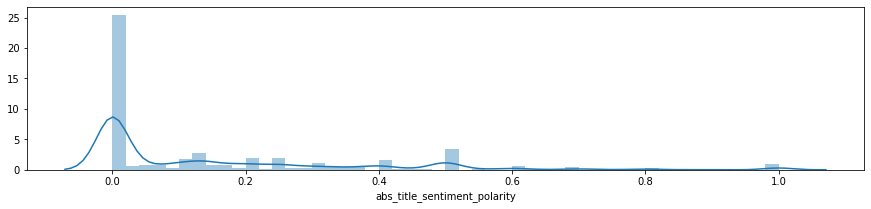

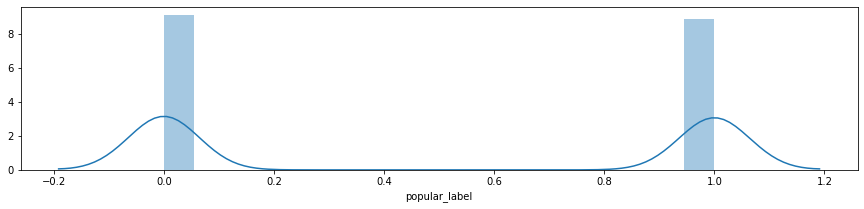

In [16]:
def dist_c(x):
    plt.figure(figsize=(15,3))
    sns.distplot(x)

for i in list1:
    dist_c(data[i])


0    20082
1    19562
Name: popular_label, dtype: int64


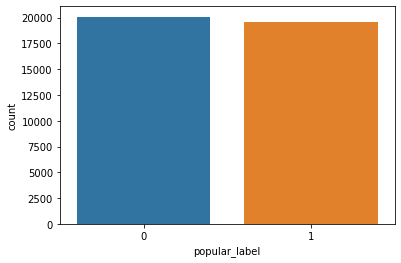

In [17]:
# distribution for the variable popular label
print(data.popular_label.value_counts())
sns.countplot(data.popular_label)

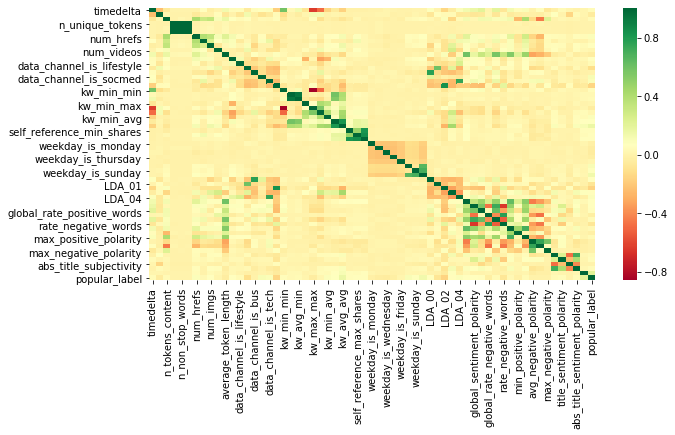

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),cmap='RdYlGn')

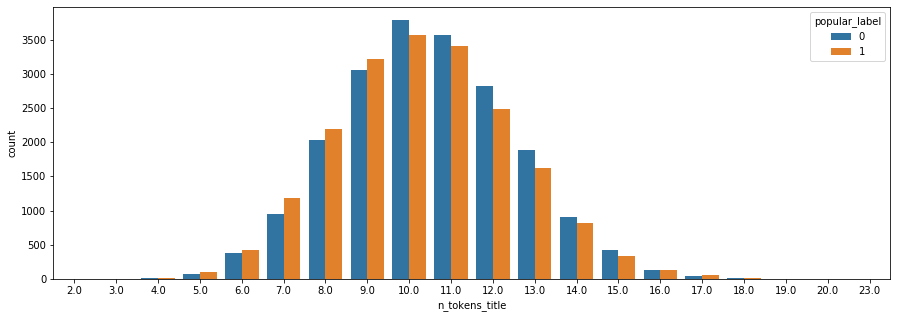

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data.n_tokens_title,hue=data.popular_label)

In [20]:
pd.crosstab(data.n_tokens_content,data.popular_label).sort_values(0,ascending=False)

popular_label,0,1
n_tokens_content,,
0.0,531,650
286.0,57,44
335.0,48,38
241.0,45,30
293.0,44,28
197.0,44,35
246.0,43,37
308.0,43,20
279.0,43,42


In [21]:
pd.crosstab(data.num_keywords,data.popular_label)

popular_label,0,1
num_keywords,,
1.0,37,14
2.0,28,17
3.0,360,275
4.0,1434,993
5.0,2678,2151
6.0,3569,3232
7.0,3570,3752
8.0,3011,3083
9.0,2316,2416


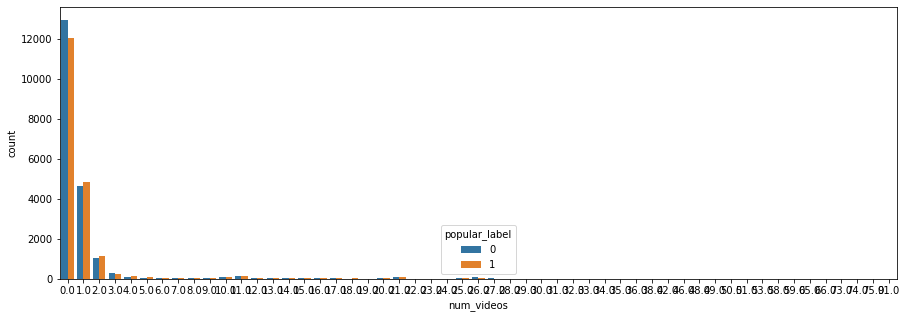

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data.num_videos,hue=data.popular_label)

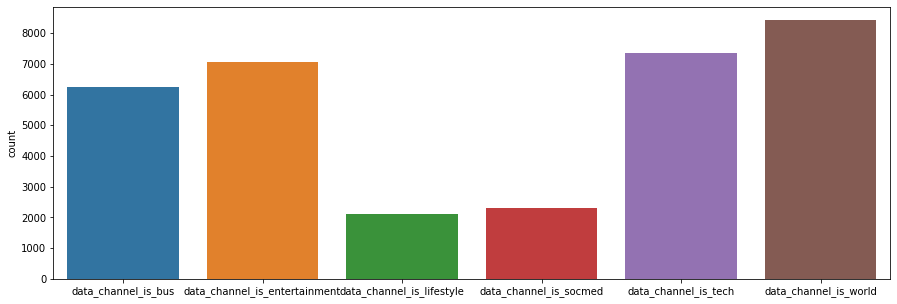

In [23]:
channel_list = ['data_channel_is_lifestyle','data_channel_is_entertainment'
                ,'data_channel_is_bus','data_channel_is_socmed'
                ,'data_channel_is_tech','data_channel_is_world']

new_thing = data[channel_list]
new_thing = new_thing.astype(int)

x= new_thing.stack()
abc = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))
plt.figure(figsize=(15,5))
sns.countplot(abc)

In [24]:
# Here highest number of news published were of the world and tech.
len(abc), data.shape[0], data.shape[0] - len(abc)

(33510, 39644, 6134)

In [25]:
data['data_channel_is_unk'] = data['data_channel_is_lifestyle']+data['data_channel_is_entertainment'] +data['data_channel_is_bus']+data['data_channel_is_socmed']+data['data_channel_is_tech']+data['data_channel_is_world']
data['data_channel_is_unk'] = data['data_channel_is_unk'].astype(int)
data['data_channel_is_unk'].replace({0:1,1:0},inplace=True)

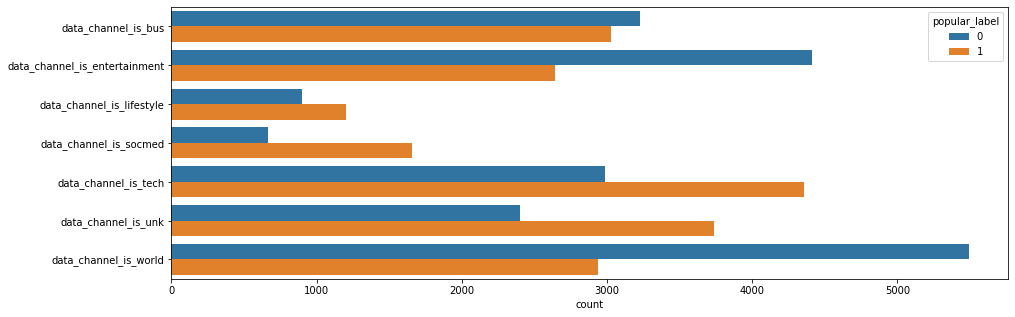

In [26]:
channel_list = ['data_channel_is_lifestyle','data_channel_is_entertainment'
                ,'data_channel_is_bus','data_channel_is_socmed'
                ,'data_channel_is_tech','data_channel_is_world','data_channel_is_unk']

new_thing = data[channel_list]
x= new_thing.stack()
abc = pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1)))
plt.figure(figsize=(15,5))
sns.countplot(y=abc,hue=data.popular_label)

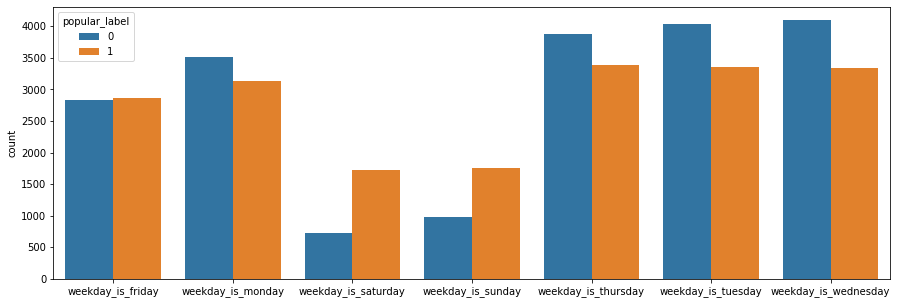

In [27]:
list2 = ['weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday'
         ,'weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday']

x = data[list2].stack()

day = pd.Categorical(x[x!=0].index.get_level_values(1))
plt.figure(figsize=(15,5))
sns.countplot(day,hue=data.popular_label)

In [28]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popular_label,data_channel_is_unk
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0,0


In [29]:
data.popular_label.value_counts()/data.shape[0]

0    0.506558
1    0.493442
Name: popular_label, dtype: float64

In [48]:
x=data.drop(['url','timedelta','shares','popular_label'],axis=1)
y = data['popular_label']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,train_size=.7)

lr = LogisticRegression().fit(x_train,y_train)
predict = lr.predict(x_test)
print('Train Score:',lr.score(x_train,y_train))
print('Test Score:',lr.score(x_test,y_test))
print('Accuracy Score',accuracy_score(y_test,predict))
print('Cohen Kappa Score',cohen_kappa_score(y_test,predict))

print(classification_report(y_test,predict))

Train Score: 0.6007207207207207
Test Score: 0.5938288212544139
Accuracy Score 0.5938288212544139
Cohen Kappa Score 0.1862605625902093
              precision    recall  f1-score   support

           0       0.60      0.64      0.61      6062
           1       0.59      0.55      0.57      5832

    accuracy                           0.59     11894
   macro avg       0.59      0.59      0.59     11894
weighted avg       0.59      0.59      0.59     11894



# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;">All Models Scores in Using the Base data

In [50]:
%%time
models = [] 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef

models.append(('Logistic Regression', LogisticRegression()))  
models.append(('KNN', KNeighborsClassifier()))
models.append(('DecisonTree', DecisionTreeClassifier()))
models.append(('Random Forest',RandomForestClassifier()))
models.append(('AdaBoostClassifier',AdaBoostClassifier()))
models.append(('BaggingClassifier',BaggingClassifier()))
models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
#models.append(('NB', GaussianNB())) 
#models.append(('SVM', SVC()))


def fun_model(x_train, x_test, y_train, y_test):
    col = []; train_score = []; acc = []; kappa=[]; f1 = []
    for i, j in models:
        pred = j.fit(x_train,y_train).predict(x_test)
        col.append(i)
        train_score.append(j.score(x_train,y_train))
        acc.append(accuracy_score(y_test,pred))
        kappa.append(cohen_kappa_score(y_test,pred))
        f1.append(f1_score(y_test,pred))

    return pd.DataFrame({'Model':col,
                  'Train set Score':train_score,
                  'Accuracy score':acc,
                  'F1_score':f1
                    ,'Cohen Kappa Score':kappa
                  }
                )


Wall time: 0 ns


In [51]:
%%time
fun_model(x_train, x_test, y_train, y_test)

Wall time: 43 s


,Model,Train set Score,Accuracy score,F1_score,Cohen Kappa Score
0,Logistic Regression,0.600721,0.593829,0.570616,0.186261
1,KNN,0.720541,0.561796,0.546546,0.122779
2,DecisonTree,1.000000,0.568438,0.564816,0.136921
3,Random Forest,0.985874,0.612662,0.570763,0.222680
4,AdaBoostClassifier,0.666378,0.655709,0.647681,0.311068
5,BaggingClassifier,0.985009,0.623592,0.584886,0.244742
6,GradientBoostingClassifier,0.686198,0.659660,0.653484,0.319106


# <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#de6114;"> Imbalance target data handling

Check conditions for data imputation and data imbalance for the given dataset. Handling data imputation if needed and balance the data (Either go for under sampling or smote).

#### Balancing the data, our data should have the good proportion of the target variable. As imbalanced data leads to biasness of the model. To avoid this there are 2 techique 1) SMOTE 2) UnderSampling



0    0.506558
1    0.493442
Name: popular_label, dtype: float64

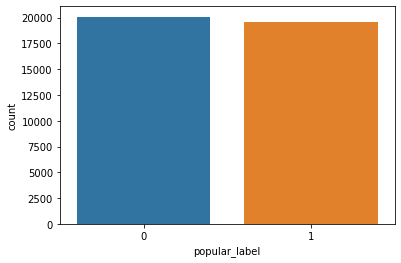

In [53]:
sns.countplot(data.popular_label)
data.popular_label.value_counts()/data.shape[0]

Original dataset shape: 39644
After using SMOTE resampled dataset shape: 40164


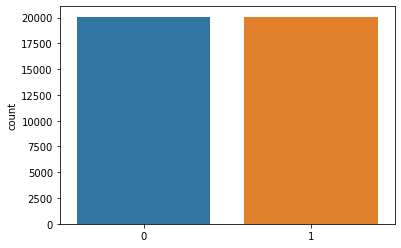

In [56]:
# we have 2664 less values than class 1 lets try to balance this one out. 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_sample(x,y)

print('Original dataset shape:', len(y))
print('After using SMOTE resampled dataset shape:', len(y_resampled))
display(sns.countplot(y_resampled))
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled,random_state=1,train_size=.7)

Original dataset shape: 39644
After using RandomUnderSampler, resampled dataset shape: 39124


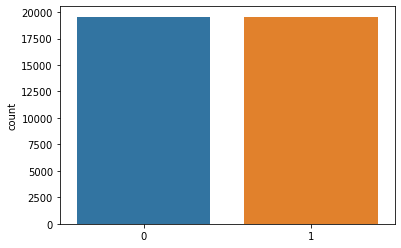

In [57]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled_und, y_resampled_und = rus.fit_resample(x, y)
print('Original dataset shape:', len(y))
print('After using RandomUnderSampler, resampled dataset shape:', len(y_resampled_und))
sns.countplot(y_resampled_und)

# Builing the data using the output of the SMOTE

In [58]:
fun_model(X_train_smote, X_test_smote, y_train_smote, y_test_smote)

,Model,Train set Score,Accuracy score,F1_score,Cohen Kappa Score
0,Logistic Regression,0.614783,0.616017,0.601704,0.231997
1,KNN,0.717365,0.564896,0.558410,0.129776
2,DecisonTree,1.000000,0.579170,0.575755,0.158332
3,Random Forest,0.985879,0.627137,0.595990,0.254198
4,AdaBoostClassifier,0.667141,0.664398,0.666226,0.328802
5,BaggingClassifier,0.984207,0.622988,0.596142,0.245909
6,GradientBoostingClassifier,0.685708,0.672199,0.672959,0.344401


# Voting Classifier

Voting Classifier will crate the multiple models and will give us the output

In [63]:
from sklearn.ensemble import VotingClassifier
dtree = DecisionTreeClassifier(); rf=RandomForestClassifier(); bagg = BaggingClassifier(); gbm = GradientBoostingClassifier() 

vc = VotingClassifier(estimators=[("tree", dtree),
                                  ("RF",rf),
                                  ("bagg", bagg),
                                 ("GBM", gbm)])
pred_vc = vc.fit(X_train_smote,y_train_smote).predict(X_test_smote)
print("accuracy score on train set", vc.score(X_train_smote,y_train_smote))
print("accuracy score on test set", accuracy_score(y_test_smote,pred_vc))
print("kappa score is", cohen_kappa_score(y_test_smote,pred_vc))
print("F1 Score is",f1_score(y_test_smote, pred_vc))

accuracy score on train set 0.9837803229707619
accuracy score on test set 0.6484647302904565
kappa score is 0.2968082734817624
F1 Score is 0.5958786491127647


# Cross Validation Score

In [88]:
from sklearn.model_selection import cross_val_score
score_cross = cross_val_score(estimator=vc, X = X_train_smote, y = y_train_smote, cv = 5)
print('Mean Score: ',score_cross.mean())

Mean Score:  0.6433099753839709


# Feature selection Using the Random Forest

In [129]:
%%time
from sklearn.ensemble import RandomForestClassifier 
feat_labels = x.columns[1:] 

forest = RandomForestClassifier(n_estimators=500,random_state=1)
forest.fit(X_train_smote, y_train_smote)


xyz = pd.DataFrame({'Columns':X_train_smote.columns,'Score':forest.feature_importances_ })
top_cols = xyz.sort_values('Score',ascending=False).head(10)['Columns'].values


Wall time: 1min 58s


In [132]:
top_cols = xyz.sort_values('Score',ascending=False).head(13)['Columns'].values
select_rfc = RandomForestClassifier(random_state=1).fit(X_train_smote[top_cols], y_train_smote) 
print(select_rfc.score(X_train_smote[top_cols], y_train_smote))
print(select_rfc.score(X_test_smote[top_cols], y_test_smote))

0.9848829764530127
0.6040663900414938


# Feature Selection Technique using SelectKBest